# Métodos de Classificação Supervisionada

#### Aprendizado Supervisionado

#### Exemplo 1.

Construir um modelo de classificação - Decisão de ir ou não a shows de comédia (binário)

In [16]:
#imports
import pandas                   as pd
import matplotlib.pyplot        as plt

from sklearn                    import tree
from sklearn.tree               import DecisionTreeClassifier, plot_tree
from sklearn.model_selection    import train_test_split
from sklearn.metrics            import accuracy_score

In [17]:
#dataset
df = pd.read_csv('dataset/shows.csv')
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [18]:
#pre-processing
df['Nationality'] = df['Nationality'].map({'UK':0, 'USA':1, 'N':2})
df['Go'] = df['Go'].map({'NO':0, 'YES':1})
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1


In [19]:
#feature selection
selection = ['Age', 'Experience', 'Rank', 'Nationality']
features = df[selection]
classes = df['Go']

In [20]:
#train and test
arvore = DecisionTreeClassifier()
arvore = arvore.fit(features.values, classes.values)

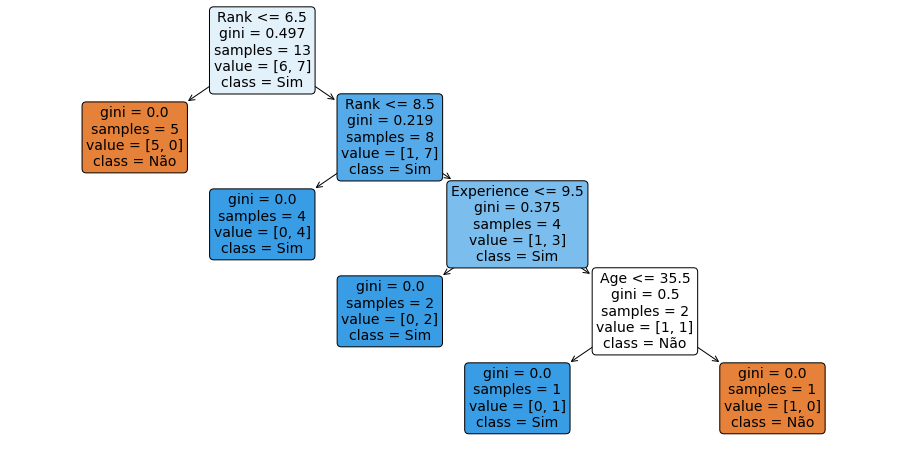

In [21]:
plt.figure(figsize=(16, 8))
plot_tree(arvore, filled=True, rounded=True, class_names=['Não', 'Sim'], feature_names=selection);

In [22]:
#predict
print(arvore.predict([[40, 10, 7, 1]]), (arvore.predict([[40, 10, 5, 1]])))

[1] [0]


#### Exemplo 2.

Usar árvores de decisão para classificar uma base de dados sobre qualidade de vinhos. Em seguida, avaliar o desempenho da classificação. (multiclasses

URL do conjunto de dados
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [8]:
vinhos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
vinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
#target analysis
vinhos['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [12]:
#feature_selection
vinhos_colunas = vinhos.columns[0:11].values.tolist()
vinhos_atributos = vinhos[vinhos_colunas]

vinhos_classes = vinhos['quality']

In [13]:
#train and test
atributos_treino, atributos_teste, vinhos_classes_treino, vinhos_classes_teste = train_test_split(vinhos_atributos, vinhos_classes, test_size=0.1, random_state=10)

vinheira = DecisionTreeClassifier()
vinheira = vinheira.fit(atributos_treino, vinhos_classes_treino)

In [14]:
#predict and accuracy
vinhos_classes_predict = vinheira.predict(atributos_teste)

acc = accuracy_score(vinhos_classes_teste, vinhos_classes_predict)
print('Accuracy: {}'.format(acc))

Accuracy: 0.625


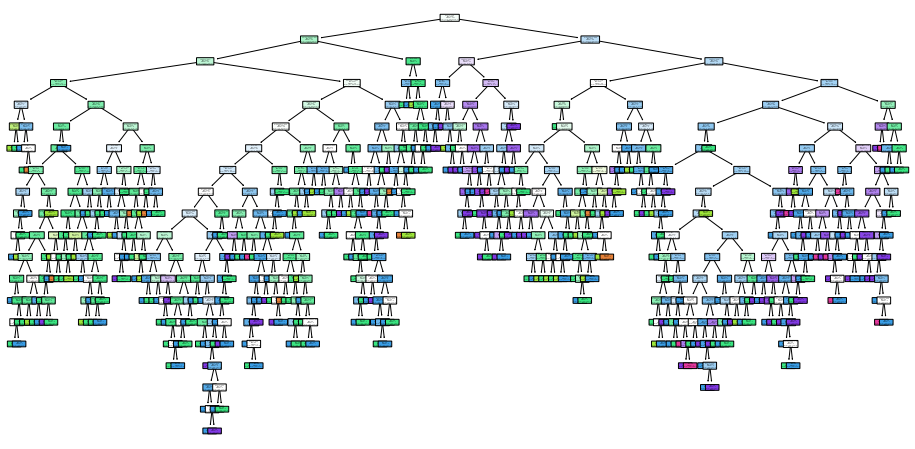

In [15]:
#plot DecisionTree
plt.figure(figsize=(16, 8))
plot_tree(vinheira, filled=True, rounded=True, class_names=['3', '4', '5', '6', '7', '8'], feature_names=vinhos_colunas);


#### Exemplo 3.

Use árvores de decisão para classificar o conjunto de dados sobre aceitabilidade de carros de acordo com as suas características. Os detalhes do conjunto de dados estão abaixo:
1. Separe os dados em treinamento e teste, e meça a acurácia do classificador. (para o treino, separe 20%)
2. Gere a imagem da árvore de decisão obtida no treinamento.

dataset: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [111]:
df3 = pd.read_csv('dataset/car.data')
df3.shape

(1728, 7)

In [112]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buyng     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   acc       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [113]:
df3.columns = ['preco_compra', 'preco_manutencao', 'numero_portas', 'capacidade_pessoas', 'tamanho_bagageiro', 'seguranca', 'aceitabilidade']
df3.head()

,preco_compra,preco_manutencao,numero_portas,capacidade_pessoas,tamanho_bagageiro,seguranca,aceitabilidade
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [114]:
#pre-processing
df3['preco_compra'] = df3['preco_compra'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})

df3['preco_manutencao'] = df3['preco_manutencao'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})

df3['numero_portas'] = df3['numero_portas'].map({'2':2, '3':3, '4':4, '5more':5})

df3['capacidade_pessoas'] = df3['capacidade_pessoas'].map({'2':2, '4':4, 'more':5})

df3['tamanho_bagageiro'] = df3['tamanho_bagageiro'].map({'small':0, 'med':1, 'big':2})

df3['seguranca'] = df3['seguranca'].map({'low':0, 'med':1, 'high':2})

df3['aceitabilidade'] = df3['aceitabilidade'].map({'unacc':0, 'acc':1, 'vgood':2, 'good':3})

In [115]:
#feature_selection
cars_columns = df3.columns[0:5].values.tolist()
cars_atributos = df3[cars_columns]

cars_classes = df3['aceitabilidade']

In [116]:
#train and test
cars_atributos_treino, cars_atributos_teste, cars_classes_treino, cars_classes_teste = train_test_split(cars_atributos, cars_classes, test_size=0.2, stratify=cars_classes, random_state=10)

arvore = DecisionTreeClassifier()
arvore = arvore.fit(cars_atributos_treino, cars_classes_treino)


In [117]:
#predict and accuracy
cars_classes_predict = arvore.predict(cars_atributos_teste)

acc = accuracy_score(cars_classes_teste, cars_classes_predict)
print('Accuracy: {}'.format(acc))

Accuracy: 0.6040462427745664


In [118]:
#plot DecisionTree
plt.figure(figsize=(200, 120))
plot_tree(arvore, filled=True, rounded=True, class_names=['Inaceitável', 'Aceitável', 'Bom', 'Muito bom'], feature_names=cars_columns);
